In [92]:
# import necesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [93]:
df = pd.read_csv("AAPL.csv")
print("Data has been loaded")

Data has been loaded


In [94]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [95]:
df.reset_index(drop=True, inplace=True)

In [96]:
print("\nData Overview:")
print(df.head())


Data Overview:
        Date       Open       High        Low      Close  Adj Close    Volume
0 2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
1 2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2 2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
3 2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
4 2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100


In [97]:
# Handle missing values
df.ffill(inplace=True)
df.bfill(inplace=True)

In [98]:
#  Normalize Price Columns (Min–Max Scaling)
price_cols = ['Open', 'High', 'Low', 'Close']
scaler = MinMaxScaler()
df[price_cols] = scaler.fit_transform(df[price_cols])
print("\n Missing values handled and price data normalized.")


 Missing values handled and price data normalized.


In [99]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
print("Preprocessing complete.")

Preprocessing complete.


In [100]:
print("\n📊 Summary Statistics:")
print(df.describe())


📊 Summary Statistics:
                                Date         Open         High          Low  \
count                           2011  2011.000000  2011.000000  2011.000000   
mean   2016-01-01 03:10:28.344107520     0.302437     0.298635     0.302721   
min              2012-01-03 00:00:00     0.000000     0.000000     0.000000   
25%              2014-01-02 12:00:00     0.129228     0.125091     0.128878   
50%              2015-12-31 00:00:00     0.244492     0.241064     0.243905   
75%              2017-12-28 12:00:00     0.465709     0.465731     0.465071   
max              2019-12-30 00:00:00     1.000000     1.000000     1.000000   
std                              NaN     0.214190     0.214984     0.215031   

             Close    Adj Close        Volume  
count  2011.000000  2011.000000  2.011000e+03  
mean      0.300985   119.505548  5.949670e+07  
min       0.000000    48.921928  1.136200e+07  
25%       0.129013    75.056679  2.758565e+07  
50%       0.242905   105.

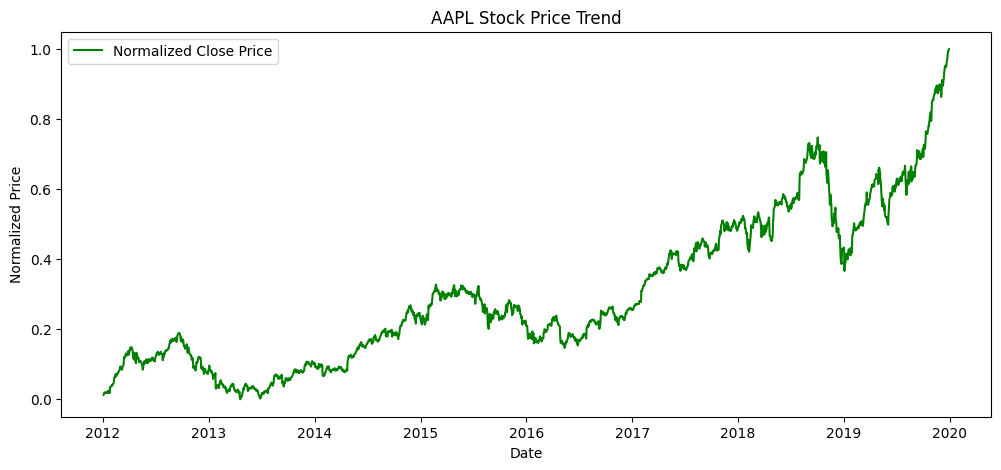

In [101]:
# --- Trend Analysis ---
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'], label='Normalized Close Price', color='GREEN')
plt.title("AAPL Stock Price Trend")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()

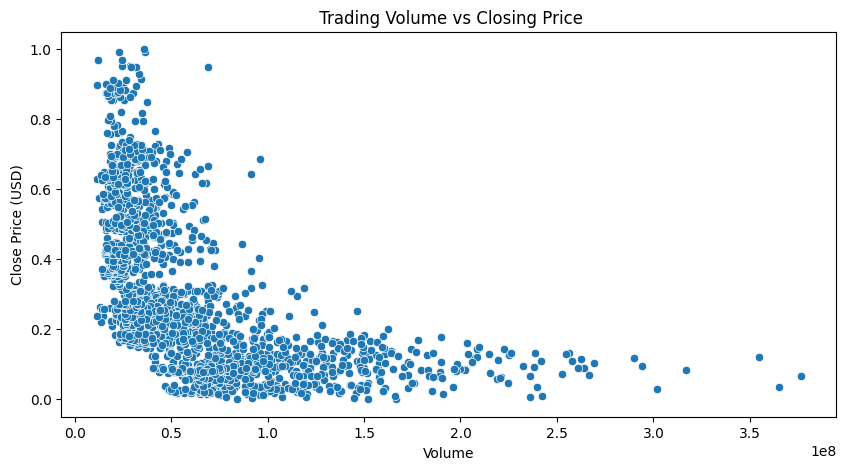

In [102]:
# Volume vs Closing Price
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Volume'], y=df['Close'])
plt.title(" Trading Volume vs Closing Price")
plt.xlabel("Volume")
plt.ylabel("Close Price (USD)")
plt.show()

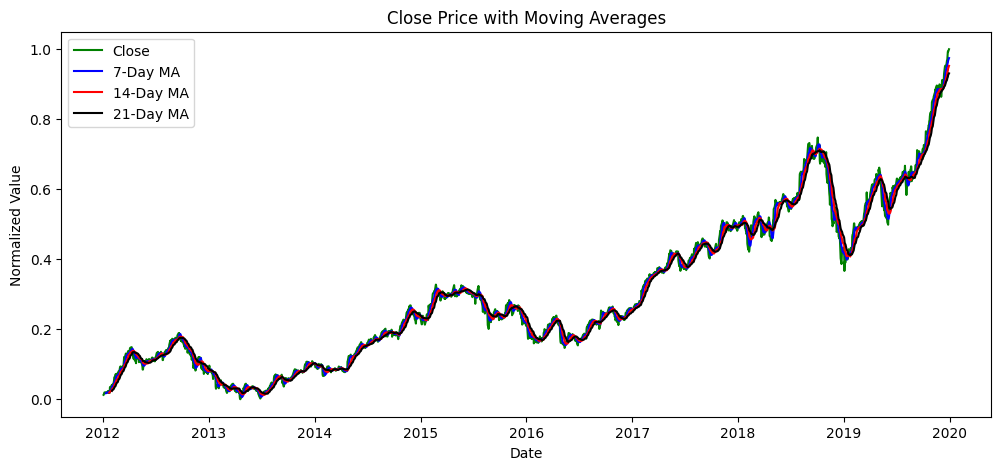

In [103]:
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_14'] = df['Close'].rolling(window=14).mean()
df['MA_21'] = df['Close'].rolling(window=21).mean()

# --- Moving Average Comparison ---
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'], label='Close',color='GREEN')
plt.plot(df['Date'], df['MA_7'], label='7-Day MA',color='blue')
plt.plot(df['Date'], df['MA_14'], label='14-Day MA',color='RED')
plt.plot(df['Date'], df['MA_21'], label='21-Day MA',color='black')
plt.title("Close Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Normalized Value")
plt.legend()
plt.show()

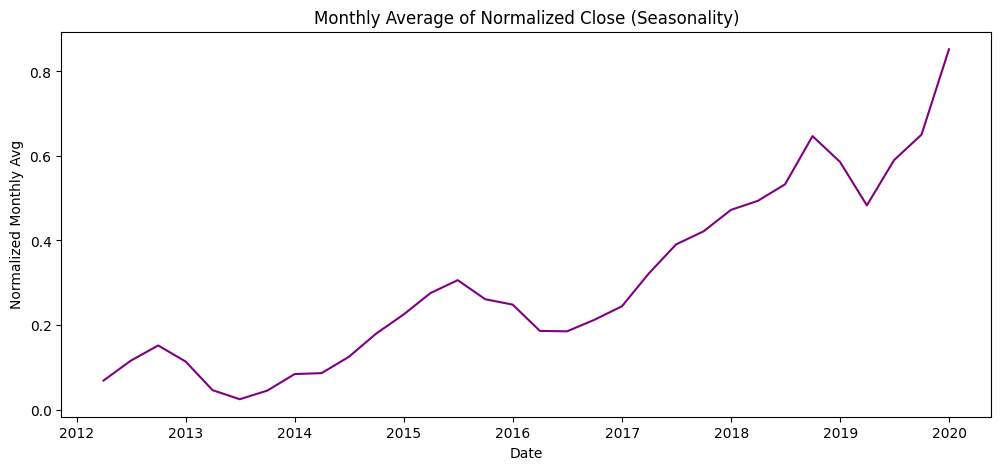

In [104]:
# --- Seasonality / Monthly Average ---
df_monthly = df.set_index('Date').resample('Q').mean()
plt.figure(figsize=(12,5))
plt.plot(df_monthly.index, df_monthly['Close'], color='purple')
plt.title("Monthly Average of Normalized Close (Seasonality)")
plt.xlabel("Date")
plt.ylabel("Normalized Monthly Avg")
plt.show()

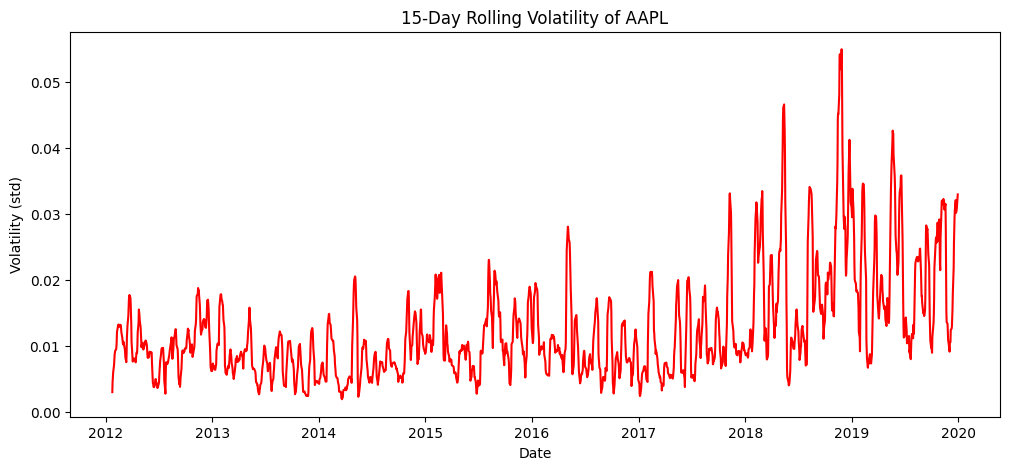

In [105]:
# --- Volatility Visualization ---
df['Volatility_15'] = df['Close'].rolling(window=15).std() # Calculate Volatility_15
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Volatility_15'], color='red')
plt.title("15-Day Rolling Volatility of AAPL")
plt.xlabel("Date")
plt.ylabel("Volatility (std)")
plt.show()

In [106]:
# Technical indicators
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_14'] = df['Close'].rolling(window=14).mean()
df['MA_21'] = df['Close'].rolling(window=21).mean()
df['Volatility_15'] = df['Close'].rolling(window=15).std()

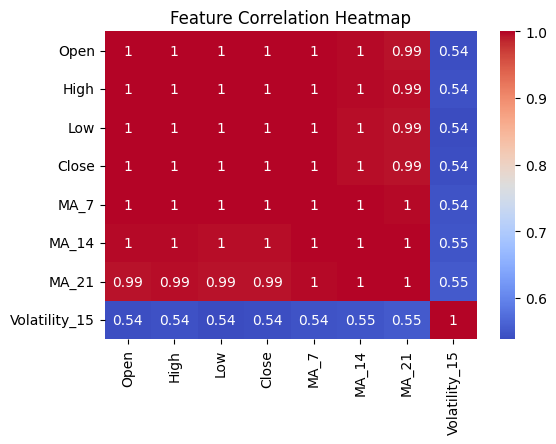

In [107]:
# --- Correlation Heatmap ---
plt.figure(figsize=(6,4))
sns.heatmap(df[['Open','High','Low','Close','MA_7','MA_14','MA_21','Volatility_15']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [108]:
#  Save Final Processed Dataset
df.to_csv("Processed_AAPL.csv", index=False)
print("\n Final processed dataset saved as 'Processed_AAPL.csv'.")


 Final processed dataset saved as 'Processed_AAPL.csv'.


In [109]:
df_1=pd.read_csv("Processed_AAPL.csv")
df_1

,Date,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_14,MA_21,Volatility_15
0,2012-01-03,0.012989,0.007780,0.014647,0.012545,50.765709,75555200,NaN,NaN,NaN,NaN
1,2012-01-04,0.013353,0.009094,0.014819,0.013884,51.038536,65005500,NaN,NaN,NaN,NaN
2,2012-01-05,0.016353,0.011428,0.016896,0.016666,51.605175,67817400,NaN,NaN,NaN,NaN
3,2012-01-06,0.019274,0.013961,0.020910,0.019314,52.144630,79573200,NaN,NaN,NaN,NaN
4,2012-01-09,0.022747,0.016976,0.022216,0.018908,52.061932,98506100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2006,2019-12-23,0.955069,0.958967,0.966753,0.968099,282.054138,24643000,0.950294,0.925157,0.911824,0.032049
2007,2019-12-24,0.972719,0.961669,0.977693,0.969244,282.322266,12119700,0.955821,0.931983,0.916367,0.030117
2008,2019-12-26,0.973271,0.983156,0.985329,0.993170,287.923645,23280300,0.961912,0.939356,0.921122,0.030495
2009,2019-12-27,1.000000,1.000000,1.000000,0.992704,287.814392,36566500,0.967602,0.945140,0.926276,0.030935


In [110]:
from sklearn.model_selection import TimeSeriesSplit

features = ['Open', 'High', 'Low', 'Volume', 'MA_7', 'MA_14', 'MA_21', 'Volatility_15']
target = 'Close'

X = df[features]
y = df[target]

# Time-based splitting
tscv = TimeSeriesSplit(n_splits=5)

In [111]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import itertools
import warnings
warnings.filterwarnings('ignore')

In [112]:

# Using Close series (reseting index for SARIMAX compatibility)
series = df['Close'].reset_index(drop=True)


In [113]:
import itertools

p = d = q = range(0, 2)  # Only 0 or 1
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in [(0,0,0), (1,0,0)]]

series_short = series[-500:]  # Only  we use last 500 points


In [114]:
best_score, best_params = float("inf"), None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(series_short, order=param, seasonal_order=param_seasonal)
            results = model.fit(disp=False)
            if results.aic < best_score:
                best_score, best_params = results.aic, (param, param_seasonal)
        except Exception:
            continue

print("Best SARIMA params:", best_params)


Best SARIMA params: ((0, 1, 0), (0, 0, 0, 12))


In [115]:
# Forecasting next 30 days
final_model = SARIMAX(series[:-30], order=best_params[0], seasonal_order=best_params[1]).fit(disp=False)
forecast = final_model.forecast(steps=30)
rmse = np.sqrt(mean_squared_error(series[-30:], forecast))
print("SARIMA 30-day RMSE:", rmse)


SARIMA 30-day RMSE: 0.05626598681964914


In [116]:
#  'series' is our original series
# Baseline SARIMA forecast (before tuning)
model_baseline = SARIMAX(series[:-30], order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
results_baseline = model_baseline.fit(disp=False)
sarima_base_forecast = results_baseline.forecast(steps=30)

# Tuned SARIMA forecast (after tuning, with best params)
best_order = (best_params[0])
best_seasonal_order = (best_params[1])
model_tuned = SARIMAX(series[:-30], order=best_order, seasonal_order=best_seasonal_order)
results_tuned = model_tuned.fit(disp=False)
forecast = results_tuned.forecast(steps=30)


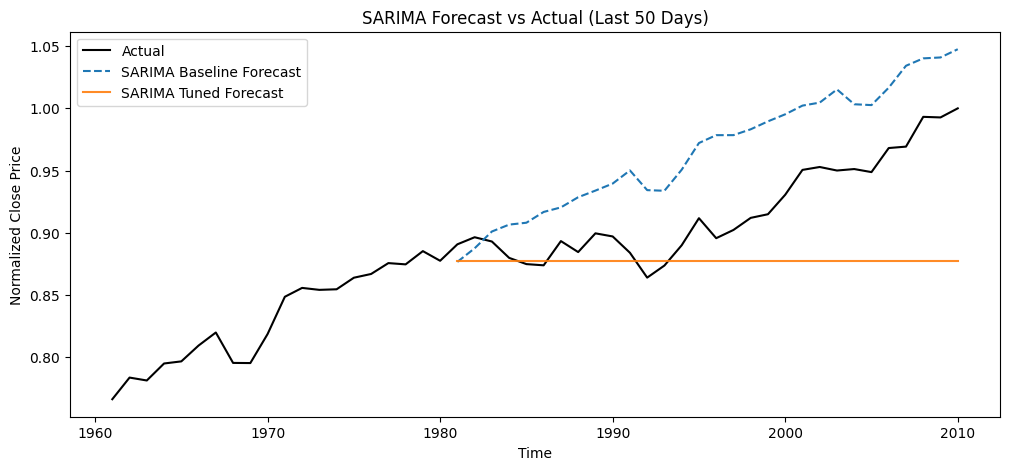

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(series[-50:], label='Actual', color='black')
plt.plot(sarima_base_forecast, label='SARIMA Baseline Forecast', linestyle='dashed')
plt.plot(forecast, label='SARIMA Tuned Forecast', alpha=0.9)

plt.title('SARIMA Forecast vs Actual (Last 50 Days)')
plt.xlabel('Time')
plt.ylabel('Normalized Close Price')
plt.legend()
plt.show()

In [118]:
for lag in range(1, 6):
    df[f'lag_{lag}'] = df['Close'].shift(lag)
df.dropna(inplace=True)

In [119]:
features_ml = features + [f'lag_{i}' for i in range(1,6)]
X_ml = df[features_ml]
y_ml = df['Close']

In [120]:
# Time-based train/test split
split_ix = -30    # Last 30 points for prediction
X_train, X_test = X_ml.iloc[:split_ix], X_ml.iloc[split_ix:]
y_train, y_test = y_ml.iloc[:split_ix], y_ml.iloc[split_ix:]

In [121]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [122]:
rf_params = {'n_estimators': [100, 200], 'max_depth': [3, 5, 7]}
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=tscv, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

In [123]:
rf_pred = rf_best.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print("Random Forest 30-day RMSE:", rf_rmse)

Random Forest 30-day RMSE: 0.0568857443605091


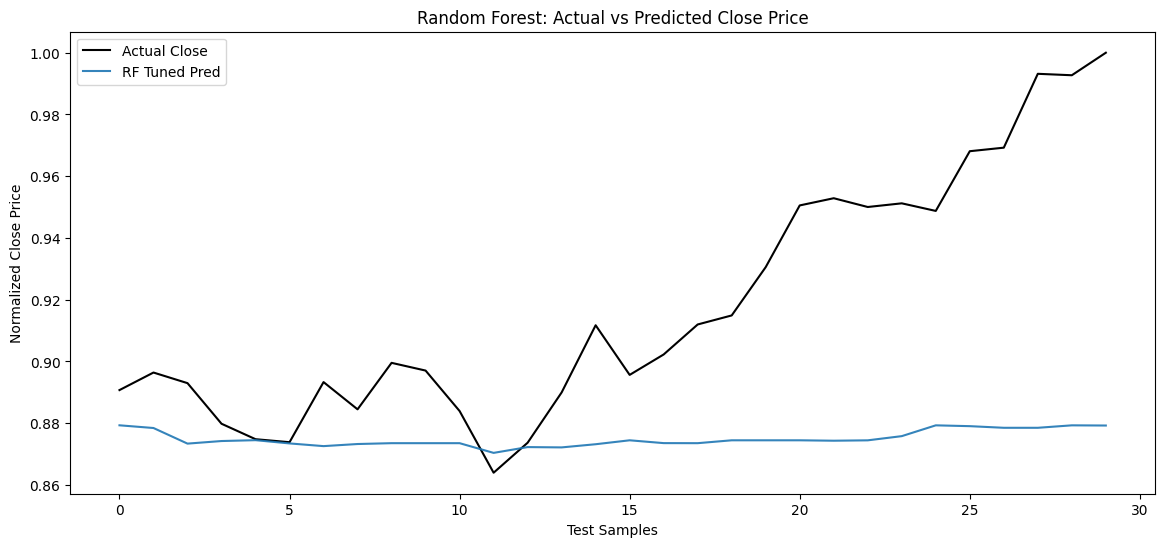

In [124]:
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='Actual Close', color='black')
plt.plot(rf_pred, label='RF Tuned Pred', alpha=0.9)
plt.title('Random Forest: Actual vs Predicted Close Price')
plt.xlabel('Test Samples')
plt.ylabel('Normalized Close Price')
plt.legend()
plt.show()

In [125]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Example for  test set:
rf_mape = mean_absolute_percentage_error(y_test, rf_pred)

print(f"Random Forest MAPE: {rf_mape:.2f}%")



Random Forest MAPE: 4.56%


In [126]:
import numpy as np

#  RMSE value
rf_rmse = 0.0568857443605091

# Converting RMSE to accuracy
rf_accuracy = (1 - rf_rmse) * 100

print(f"Random Forest RMSE: {rf_rmse:.6f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}%")



Random Forest RMSE: 0.056886
Random Forest Accuracy: 94.31%


In [127]:
!pip install streamlit

In [128]:
!pip install matplotlib scikit-learn

In [129]:
import streamlit as st
import pandas as pd
import numpy as np

try:
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
    from sklearn.metrics import mean_squared_error, r2_score
except ModuleNotFoundError:
    st.error(" scikit-learn is not installed. Add it to requirements.txt")
    st.stop()

import plotly.graph_objects as go

st.title(" Stock Price Prediction (Smooth Forecast)")
st.write("Upload your stock data (Date, Open, High, Low, Close, Volume).")

uploaded_file = st.file_uploader("Upload CSV File", type=['csv'])

if uploaded_file:
    df = pd.read_csv(uploaded_file)

    st.subheader(" Dataset Preview")
    st.dataframe(df.head())

    date_col = [col for col in df.columns if 'date' in col.lower()]
    if date_col:
        df[date_col[0]] = pd.to_datetime(df[date_col[0]], errors='coerce')
        df.dropna(subset=[date_col[0]], inplace=True)
        df.rename(columns={date_col[0]: 'Date'}, inplace=True)
    else:
        st.warning("No 'Date' column found in the uploaded CSV. Ensure your CSV has a 'Date' column.")
        st.stop()

    features = ['Open', 'High', 'Low', 'Volume']
    for lag in range(1, 6):
        df[f'lag_{lag}'] = df['Close'].shift(lag)
    df.dropna(inplace=True)

    features_ml = features + [f'lag_{i}' for i in range(1, 6)]
    X_ml = df[features_ml]
    y_ml = df['Close']
    rf_params = {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7]
        }

    # Set parameters directly as you requested
    rf = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=42)
    rf.fit(X_ml, y_ml)

    y_pred_in_sample = rf.predict(X_ml)
    rmse = np.sqrt(mean_squared_error(y_ml, y_pred_in_sample))
    r2 = r2_score(y_ml, y_pred_in_sample)
    st.write(f"**RMSE:** {rmse:.4f}")
    st.write(f"**R² Score:** {r2:.4f}")

    st.subheader(" Select Forecast Days")
    forecast_days = st.slider("Forecast Days", 1, 90, 30)

    last_row = X_ml.iloc[-1].copy()
    forecast = []
    prev_close = df['Close'].iloc[-1]
    for i in range(forecast_days):
        pred = rf.predict([last_row.values])[0]
        smoothed_pred = 0.7 * prev_close + 0.3 * pred
        forecast.append(smoothed_pred)
        prev_close = smoothed_pred
        for lag in range(5, 1, -1):
            last_row[f'lag_{lag}'] = last_row[f'lag_{lag-1}']
        last_row['lag_1'] = smoothed_pred

    future_dates = pd.date_range(df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=forecast_days)
    forecast_df = pd.DataFrame({"Date": future_dates, "Predicted_Close": forecast})

    st.subheader(" Pick Forecast Day")
    specific_day = st.slider("Forecast day:", 1, forecast_days, 1)
    st.write(f"Predicted Close Price Day {specific_day} ({future_dates[specific_day-1].date()}): **{forecast[specific_day-1]:.2f}**")

    df = df.sort_values('Date')


    st.subheader(" Interactive Smoothed Forecast Plot")
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=df['Date'],
        y=df['Close'],
        mode='lines',
        name='Historical Close',
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=future_dates,
        y=forecast,
        mode='lines+markers',
        name='Forecast (Smoothed)',
        line=dict(color='green', dash='dot'),
        marker=dict(size=5)
    ))
    fig.add_trace(go.Scatter(
        x=[future_dates[specific_day-1]],
        y=[forecast[specific_day-1]],
        mode='markers',
        name=f'Day {specific_day} Forecast',
        marker=dict(color='red', size=11, symbol='circle')
    ))
    fig.update_layout(
        title="Stock Price Forecast (Smoothed)",
        xaxis_title="Date",
        yaxis_title="Close Price",
        template='plotly_white',
        hovermode='x unified'
    )
    st.plotly_chart(fig, use_container_width=True)

    st.download_button(
        label="Download Forecast CSV",
        data=forecast_df.to_csv(index=False),
        file_name=f'forecast_{forecast_days}_days.csv',
        mime='text/csv'
    )

else:
    st.info("Please upload a CSV file to proceed.")


2025-11-25 15:56:35.397 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-25 15:56:35.401 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-25 15:56:35.412 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-25 15:56:35.417 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-25 15:56:35.425 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-25 15:56:35.431 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-25 15:56:35.433 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-25 15:56:35.440 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [130]:
!streamlit run app.py


Usage: streamlit run [OPTIONS] [TARGET] [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
